In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import time

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
seed = 1
img_h = 100
img_w = 100
data_dir = 'FotoAI2020'

train_set = tf.keras.preprocessing.image_dataset_from_directory(
    directory=data_dir,
    validation_split=0.3,
    subset='training',
    batch_size=32,
    color_mode='grayscale',
    image_size=(img_h, img_w),
    seed=seed
)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'FotoAI2020'

In [3]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    directory=data_dir,
    validation_split=0.3,
    subset='validation',
    batch_size=32,
    color_mode='grayscale',
    image_size=(img_h, img_w),
    seed=seed
)

Found 420 files belonging to 43 classes.
Using 126 files for validation.


In [4]:
classes = train_set.class_names
print(classes)

['AAA', 'ABI', 'AFI', 'AGH', 'AIL', 'ARL', 'ASA', 'BDL', 'DIA', 'DIO', 'DRA', 'EZA', 'FAR', 'FMR', 'FRS', 'GLA', 'GPS', 'HMA', 'HZR', 'IDR', 'KDA', 'MAA', 'MAJ', 'MFA', 'MFH', 'MGN', 'MMF', 'MRF', 'MSA', 'MZA', 'MZB', 'NIS', 'QTH', 'RCK', 'RKS', 'SAD', 'SHE', 'SNN', 'SVD', 'SYH', 'SYN', 'YSS', 'ZHT']


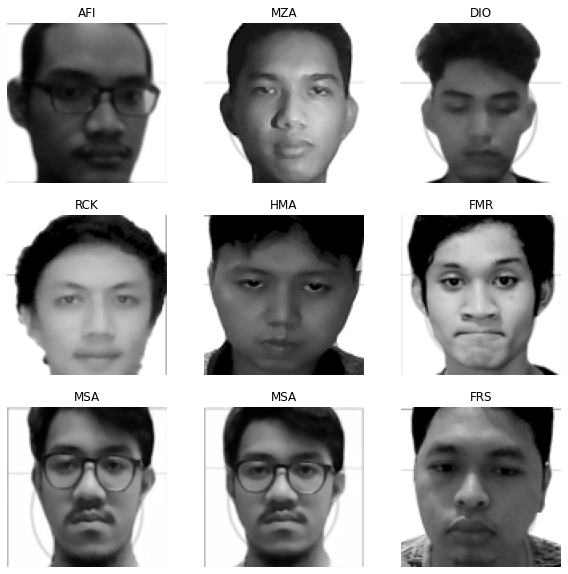

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
    plt.axis("off")

In [6]:
for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 100, 100, 1)
(32,)


In [7]:
train_set = train_set.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_set = test_set.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [9]:
normalized_ds = train_set.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [10]:
num_classes = 43

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_h, img_w, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0

In [13]:
class timecallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.times = []
        # use this value as reference to calculate cummulative time taken
        self.timetaken = time.time()
    def on_epoch_end(self,epoch,logs = {}):
        self.times.append((epoch, time.time() - self.timetaken))
    def on_train_end(self,logs = {}):
        plt.xlabel('Epoch')
        plt.ylabel('Total time taken until an epoch in seconds')
        plt.plot(*zip(*self.times))
        plt.show()
        print('Total Time to Epoch ', self.times[-1][0], ': ', self.times[-1][1], ' Seconds')

Epoch 1/10
10/10 [==============================] - 2s 105ms/step - loss: 3.7612 - accuracy: 0.0204 - val_loss: 3.7081 - val_accuracy: 0.0714
Epoch 2/10
10/10 [==============================] - 1s 85ms/step - loss: 3.5530 - accuracy: 0.1088 - val_loss: 3.4024 - val_accuracy: 0.1667
Epoch 3/10
10/10 [==============================] - 1s 85ms/step - loss: 2.7220 - accuracy: 0.4252 - val_loss: 2.3137 - val_accuracy: 0.4524
Epoch 4/10
10/10 [==============================] - 1s 87ms/step - loss: 1.2291 - accuracy: 0.7109 - val_loss: 1.2705 - val_accuracy: 0.7619
Epoch 5/10
10/10 [==============================] - 1s 88ms/step - loss: 0.4735 - accuracy: 0.9014 - val_loss: 0.4644 - val_accuracy: 0.8571
Epoch 6/10
10/10 [==============================] - 1s 87ms/step - loss: 0.1863 - accuracy: 0.9422 - val_loss: 0.4464 - val_accuracy: 0.8651
Epoch 7/10
10/10 [==============================] - 1s 87ms/step - loss: 0.0861 - accuracy: 0.9762 - val_loss: 0.4864 - val_accuracy: 0.8968
Epoch 8/10
1

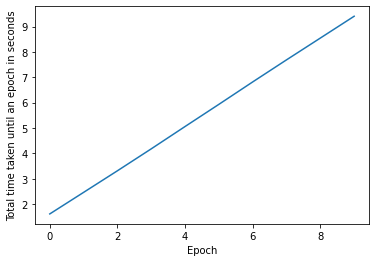

Total Time to Epoch  9 :  9.404483556747437  Seconds


In [14]:
epochs = 10
timetaken = timecallback()
history = model.fit(
  train_set,
  validation_data=test_set,
  epochs=epochs,
  callbacks=[timetaken]
)

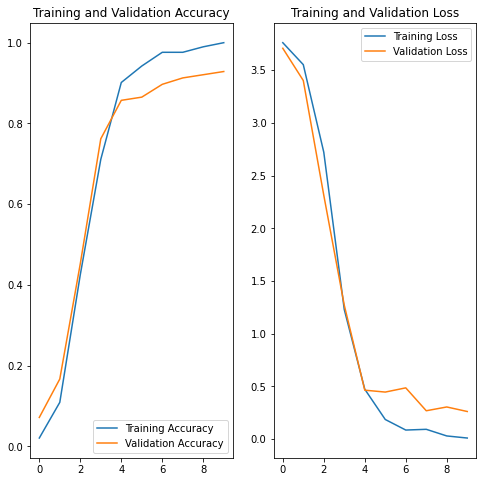

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

BPNN

In [16]:
model = Sequential([
    keras.layers.Reshape(target_shape=(100 * 100 * 1,), input_shape=(100, 100, 1)),
    keras.layers.Dense(units=512, activation='relu'),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=43, activation='softmax')
])

Epoch 1/50


c:\users\pc\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


10/10 [==============================] - 1s 31ms/step - loss: 154.9119 - accuracy: 0.0238 - val_loss: 105.0335 - val_accuracy: 0.0238
Epoch 2/50
10/10 [==============================] - 0s 21ms/step - loss: 77.6134 - accuracy: 0.0714 - val_loss: 66.5202 - val_accuracy: 0.0635
Epoch 3/50
10/10 [==============================] - 0s 21ms/step - loss: 51.3332 - accuracy: 0.1293 - val_loss: 46.6768 - val_accuracy: 0.0873
Epoch 4/50
10/10 [==============================] - 0s 22ms/step - loss: 34.9404 - accuracy: 0.2109 - val_loss: 36.9681 - val_accuracy: 0.1508
Epoch 5/50
10/10 [==============================] - 0s 20ms/step - loss: 25.6942 - accuracy: 0.2619 - val_loss: 29.9652 - val_accuracy: 0.1270
Epoch 6/50
10/10 [==============================] - 0s 22ms/step - loss: 20.3552 - accuracy: 0.3571 - val_loss: 25.6698 - val_accuracy: 0.1429
Epoch 7/50
10/10 [==============================] - 0s 22ms/step - loss: 16.0708 - accuracy: 0.3878 - val_loss: 23.6585 - val_accuracy: 0.1825
Epoch 8/

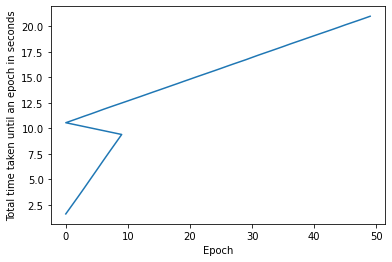

Total Time to Epoch  49 :  21.00454354286194  Seconds
Runtime :  11.219468593597412 s


In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001, decay=0.005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

callback_acc = tf.keras.callbacks.EarlyStopping(
    monitor='acc', min_delta=0.01, patience=3, verbose=0, mode='max',
    baseline=None, restore_best_weights=True
)

history = model.fit(
    train_set,
    validation_data=test_set,
    epochs=50,
    batch_size=16,
    callbacks=[timetaken]
)

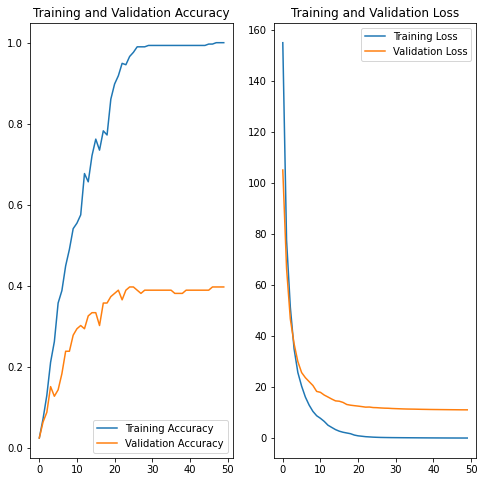

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()